In [1]:
using DataFrames
using Arrow
using Statistics
using Clustering
using Distances
using Plots
using Chain
using FreqTables
using StatsBase

In [2]:
ENV["COLUMNS"] = 1200
ENV["LINES"] = 20
sales = DataFrame(Arrow.Table("./data/sales_norm.arrow"))

,P1,P2,P3,P4,P5,P6,P7,P8,P9,P10,P11,P12,P13,P14,P15,P16,P17,P18,P19,P20,P21,P22,P23,P24,P25,P26,P27,P28,P29,P30,P31,P32,P33,P34,P35,P36,P37,P38,P39,P40,P41,P42,P43,P44,P45,P46,P47,P48,P49,P50,P51,P52,P53,P54,P55,P56,P57,P58,P59,P60,P61,P62,P63,P64,P65,P66,P67,P68,P69,P70,P71,P72,P73,P74,P75,P76,P77,P78,P79,P80,P81,P82,P83,P84,P85,P86,P87,P88,P89,P90,P91,P92,P93,P94,P95,P96,P97,P98,P99,P100,P101,P102,P103,P104,P105,P106
,Float64,Float64,Float64,Float64,Float64,Float64,Float64,Float64,Float64,Float64,Float64,Float64,Float64,Float64,Float64,Float64,Float64,Float64,Float64,Float64,Float64,Float64,Float64,Float64,Float64,Float64,Float64,Float64,Float64,Float64,Float64,Float64,Float64,Float64,Float64,Float64,Float64,Float64,Float64,Float64,Float64,Float64,Float64,Float64,Float64,Float64,Float64,Float64,Float64,Float64,Float64,Float64,Float64,Float64,Float64,Float64,Float64,Float64,Float64,Float64,Float64,Float64,Float64,Float64,Float64,Float64,Float64,Float64,Float64,Float64,Float64,Float64,Float64,Float64,Float64,Float64,Float64,Float64,Float64,Float64,Float64,Float64,Float64,Float64,Float64,Float64,Float64,Float64,Float64,Float64,Float64,Float64,Float64,Float64,Float64,Float64,Float64,Float64,Float64,Float64,Float64,Float64,Float64,Float64,Float64,Float64
1,0.369588,1.27724,-0.579404,1.04645,-0.142511,-0.498219,-0.0405672,-0.237123,0.983832,0.483169,0.965096,-0.470112,0.783898,0.493861,-1.96494,-0.848928,1.84777,1.07741,-0.954593,1.39934,1.03811,-0.34603,-0.636501,-0.0120404,-0.750642,0.983263,1.1921,0.263678,0.226148,1.73689,-0.451463,1.78403,0.953724,1.26766,-0.10993,0.670228,0.0362178,0.0641288,-0.342746,0.652605,0.00466017,1.26108,-1.00828,0.212307,1.07535,-0.742753,0.817533,-0.703073,0.370776,1.08344,0.229837,0.948847,-1.06505,0.714517,0.343167,-0.244034,0.598411,-0.212711,-1.40419,0.504808,-1.03487,-0.829129,0.240485,0.321335,1.33058,-0.0510801,0.512905,1.51857,-1.02136,-0.14412,-1.00276,-1.0893,0.273169,-0.303024,-0.176408,-0.659253,1.15005,0.914915,0.632646,0.911137,1.38497,0.467281,1.43092,-0.607456,0.963944,0.691473,-0.250993,1.57763,-1.06982,1.38263,0.429042,-1.14913,0.702848,2.05291,-0.0833461,-0.500986,-0.365434,-0.0204771,2.09249,0.397337,-1.12565,0.364633,-0.411871,0.0194259,-0.897847,0.087946
2,0.640272,0.854207,0.790096,-0.075517,-1.06883,-0.498219,1.64703,-0.962441,-0.369588,-0.0793262,-1.27781,0.050012,0.254512,0.039334,1.28671,-1.26935,0.743354,0.795874,-0.213715,2.77878,-1.29444,1.17455,0.485467,0.739282,-0.438375,0.983263,-0.0886683,-0.11719,-0.508832,0.450306,2.55829,1.17967,0.108378,0.623928,0.353557,-0.415124,0.439787,-0.0400805,-1.58044,-1.12014,-0.964655,-0.652622,0.712634,-0.804531,-0.358452,1.6093,1.06614,2.01421,-0.995548,-1.98959,-0.837264,1.48956,0.213011,0.851116,-0.223331,-0.671778,-0.883368,0.0862342,1.43146,1.0072,-0.309623,2.25049,0.488113,0.742581,0.172586,0.673328,-0.37613,0.690259,1.27022,0.926484,0.601654,-0.106331,-0.355361,-0.00571743,1.32964,0.200848,1.15005,1.04455,0.224825,-0.216937,-0.78917,1.10672,0.661183,-0.99583,0.304403,0.0377167,1.00699,-0.530034,-0.809255,0.171738,0.783171,-0.0506968,0.0885943,0.0833283,0.729278,0.0445904,0.752363,-1.08529,0.533614,-1.0937,1.8187,1.42644,-1.07087,0.0194259,-0.384792,-0.216934
3,0.0989037,-0.414901,-0.237029,1.32694,1.40135,-0.903022,-0.462466,0.488195,-0.0989037,-0.0793262,0.965096,-1.51036,-0.0101805,-0.642456,1.53684,-1.26935,0.743354,0.936641,1.86074,0.709618,0.0384487,-0.34603,-0.075517,-1.13902,0.342293,-0.34134,-0.216745,0.644546,-0.0188456,1.60823,-0.752438,0.273124,-0.173404,-1.69352,-1.34589,0.429039,0.977879,0.689385,-0.714054,-1.12014,-1.08582,1.00592,0.368452,-0.659269,0.945009,-0.247584,-0.798409,0.655568,1.12985,2.10779,-0.197003,0.543312,0.639033,0.168122,1.47616,1.18178,0.474929,0.684124,0.36809,1.63519,-0.0195258,0.40272,2.34532,-0.380741,-0.116913,1.15627,0.80925,0.138052,1.67462,2.39856,0.200551,0.508027,0.398875,-0.897637,0.234333,1.30669,0.69003,-0.122155,1.72017,0.159087,1.1132,2.70531,-0.108552,-0.348541,-0.487045,0.03771

In [3]:
sales_mat = Matrix(sales)
println("Extrema of the column means: ", extrema(mean(sales_mat, dims=1)))
println("Extrema of the column standard deviations: ", extrema(std(sales_mat, dims=1)))

Extrema of the column means: (-4.526293869625638e-16, 5.252208924188241e-16)
Extrema of the column standard deviations: (0.9999999999999998, 1.0000000000000002)


In [4]:
kmpp_results = [kmeans(sales_mat, i; init=:kmpp) for i in 2:20];
rand_results = [kmeans(sales_mat, i; init=:rand) for i in 2:20];

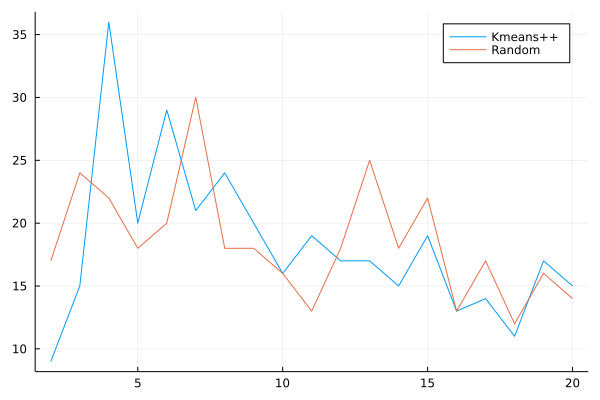

In [5]:
ax = plot([(nclusters(r), r.iterations) for r in kmpp_results], label="Kmeans++")
plot!(ax, [(nclusters(r), r.iterations) for r in rand_results], label="Random")

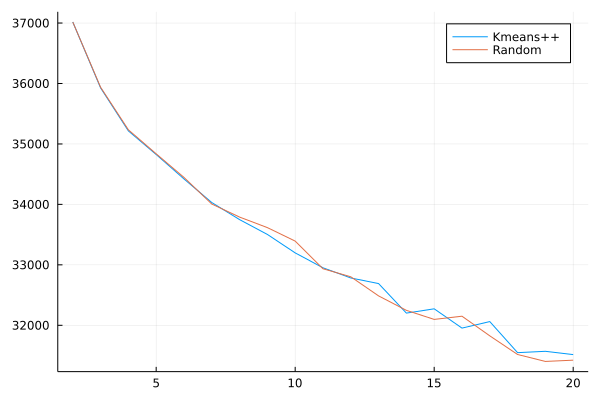

In [6]:
ax = plot([(nclusters(r), r.totalcost) for r in kmpp_results], label="Kmeans++")
plot!(ax, [(nclusters(r), r.totalcost) for r in rand_results], label="Random")

In [7]:
first(sales, 5)

,P1,P2,P3,P4,P5,P6,P7,P8,P9,P10,P11,P12,P13,P14,P15,P16,P17,P18,P19,P20,P21,P22,P23,P24,P25,P26,P27,P28,P29,P30,P31,P32,P33,P34,P35,P36,P37,P38,P39,P40,P41,P42,P43,P44,P45,P46,P47,P48,P49,P50,P51,P52,P53,P54,P55,P56,P57,P58,P59,P60,P61,P62,P63,P64,P65,P66,P67,P68,P69,P70,P71,P72,P73,P74,P75,P76,P77,P78,P79,P80,P81,P82,P83,P84,P85,P86,P87,P88,P89,P90,P91,P92,P93,P94,P95,P96,P97,P98,P99,P100,P101,P102,P103,P104,P105,P106,P107,P108,P109
,Float64,Float64,Float64,Float64,Float64,Float64,Float64,Float64,Float64,Float64,Float64,Float64,Float64,Float64,Float64,Float64,Float64,Float64,Float64,Float64,Float64,Float64,Float64,Float64,Float64,Float64,Float64,Float64,Float64,Float64,Float64,Float64,Float64,Float64,Float64,Float64,Float64,Float64,Float64,Float64,Float64,Float64,Float64,Float64,Float64,Float64,Float64,Float64,Float64,Float64,Float64,Float64,Float64,Float64,Float64,Float64,Float64,Float64,Float64,Float64,Float64,Float64,Float64,Float64,Float64,Float64,Float64,Float64,Float64,Float64,Float64,Float64,Float64,Float64,Float64,Float64,Float64,Float64,Float64,Float64,Float64,Float64,Float64,Float64,Float64,Float64,Float64,Float64,Float64,Float64,Float64,Float64,Float64,Float64,Float64,Float64,Float64,Float64,Float64,Float64,Float64,Float64,Float64,Float64,Float64,Float64,Float64,Float64,Float64
1,0.369588,1.27724,-0.579404,1.04645,-0.142511,-0.498219,-0.0405672,-0.237123,0.983832,0.483169,0.965096,-0.470112,0.783898,0.493861,-1.96494,-0.848928,1.84777,1.07741,-0.954593,1.39934,1.03811,-0.34603,-0.636501,-0.0120404,-0.750642,0.983263,1.1921,0.263678,0.226148,1.73689,-0.451463,1.78403,0.953724,1.26766,-0.10993,0.670228,0.0362178,0.0641288,-0.342746,0.652605,0.00466017,1.26108,-1.00828,0.212307,1.07535,-0.742753,0.817533,-0.703073,0.370776,1.08344,0.229837,0.948847,-1.06505,0.714517,0.343167,-0.244034,0.598411,-0.212711,-1.40419,0.504808,-1.03487,-0.829129,0.240485,0.321335,1.33058,-0.0510801,0.512905,1.51857,-1.02136,-0.14412,-1.00276,-1.0893,0.273169,-0.303024,-0.176408,-0.659253,1.15005,0.914915,0.632646,0.911137,1.38497,0.467281,1.43092,-0.607456,0.963944,0.691473,-0.250993,1.57763,-1.06982,1.38263,0.429042,-1.14913,0.702848,2.05291,-0.0833461,-0.500986,-0.365434,-0.0204771,2.09249,0.397337,-1.12565,0.364633,-0.411871,0.0194259,-0.897847,0.087946,0.337189,-1.44168,-0.126168
2,0.640272,0.854207,0.790096,-0.075517,-1.06883,-0.498219,1.64703,-0.962441,-0.369588,-0.0793262,-1.27781,0.050012,0.254512,0.039334,1.28671,-1.26935,0.743354,0.795874,-0.213715,2.77878,-1.29444,1.17455,0.485467,0.739282,-0.438375,0.983263,-0.0886683,-0.11719,-0.508832,0.450306,2.55829,1.17967,0.108378,0.623928,0.353557,-0.415124,0.439787,-0.0400805,-1.58044,-1.12014,-0.964655,-0.652622,0.712634,-0.804531,-0.358452,1.6093,1.06614,2.01421,-0.995548,-1.98959,-0.837264,1.48956,0.213011,0.851116,-0.223331,-0.671778,-0.883368,0.0862342,1.43146,1.0072,-0.309623,2.25049,0.488113,0.742581,0.172586,0.673328,-0.37613,0.690259,1.27022,0.926484,0.601654,-0.106331,-0.355361,-0.00571743,1.32964,0.200848,1.15005,1.04455,0.224825,-0.216937,-0.78917,1.10672,0.661183,-0.99583,0.304403,0.0377167,1.00699,-0.530034,-0.809255,0.171738,0.783171,-0.0506968,0.0885943,0.0833283,0.729278,0.0445904,0.752363,-1.08529,0.533614,-1.0937,1.8187,1.42644,-1.07087,0.0194259,-0.384792,-0.216934,0.337189,-0.428608,-0.438585
3,0.0989037,-0.414901,-0.237029,1.32694,1.40135,-0.903022,-0.462466,0.488195,-0.0989037,-0.0793262,0.965096,-1.51036,-0.0101805,-0.642456,1.53684,-1.26935,0.743354,0.936641,1.86074,0.709618,0.0384487,-0.34603,-0.075517,-1.13902,0.342293,-0.34134,-0.216745,0.644546,-0.0188456,1.60823,-0.752438,0.273124,-0.173404,-1.69352,-1.34589,0.429039,0.977879,0.689385,-0.714054,-1.12014,-1.08582,1.00592,0.368452,-0.659269,0.945009,-0.247584,-0.798409,0.655568,1.12985,2.10779,-0.197003,0.543312,0.639033,0.168122,1.47616,1.18178,0.474929,0.684124,0.36809,1.63519,-0.0195258,0.40272,2.34532,-0.380741,-0.116913,1.15627,0.80925,0.138052,1.67462,2.39856,0.200551,0.508027,0.398875,-0.897637,0.234333

In [8]:
freqtable(kmpp_results[3].assignments, rand_results[3].assignments)

4×4 Named Matrix{Int64}
Dim1 ╲ Dim2 │   1    2    3    4
────────────┼───────────────────
1           │   7  195    2    3
2           │  10    2   20  190
3           │   0    2  161    3
4           │ 216    0    0    0

In [9]:
kmpp_runs = [kmeans(sales_mat, 4; init=:kmpp) for _ in 1:1000]
rand_runs = [kmeans(sales_mat, 4; init=:rand) for _ in 1:1000];

In [10]:
(variation([r.totalcost for r in kmpp_runs]), variation([r.totalcost for r in rand_runs]))
# Very small CoV => results are stable

(0.0023850568743523162, 0.002406285996419716)

In [11]:
kmpp_best = kmpp_runs[argmin([r.totalcost for r in kmpp_runs])]
rand_best = rand_runs[argmin([r.totalcost for r in rand_runs])]

KmeansResult{Matrix{Float64}, Float64, Int64}([-0.1683318881106974 0.15782701160099905 -0.056962781948300324 -0.343885533978458; -0.1155109566119854 0.258918201360389 -0.1109186440998913 -0.2891517621087477; … ; 0.37826118516314344 -0.44613887251297824 0.6112948677886928 0.6156758910985586; -0.11885289330002478 -0.8215596344257458 0.9421336534315844 2.4550685408546786], [2, 1, 1, 1, 2, 3, 2, 3, 3, 2  …  1, 4, 4, 3, 4, 1, 4, 4, 1, 1], [47.385598040327295, 55.41702704430136, 51.19723160172861, 50.276866519871874, 44.901185899025016, 46.044285434509874, 44.46595712379385, 53.380584510554186, 40.01056068924077, 41.95662513040032  …  54.91941435234073, 46.757449883083, 47.72802361101929, 40.78100332190782, 41.32571779467691, 53.80796543313502, 40.20306339720234, 39.872549196743925, 47.62831539507436, 51.180925595507894], [209, 227, 206, 169], [209, 227, 206, 169], 35206.45477699876, 20, true)

In [12]:
[kmpp_best.counts rand_best.counts]
# => The clusters seem fairly evenly distributed

4×2 Matrix{Int64}:
 225  209
 165  227
 205  206
 216  169

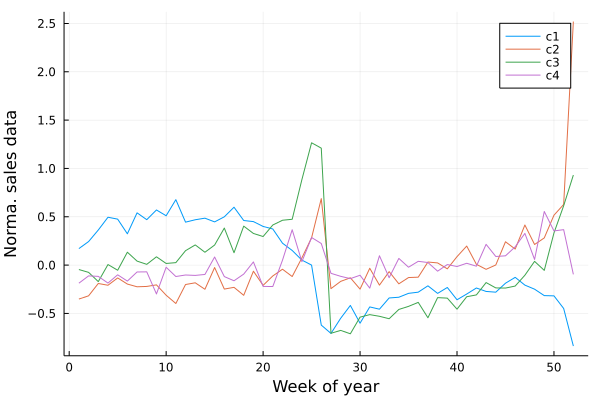

In [18]:
cluster_means = hcat([mean(sales_mat[:, kmpp_best.assignments .== i], dims=2) for i in 1:4]...)
plot(cluster_means, xlab="Week of year", ylab="Norma. sales data", labels=["c1" "c2" "c3" "c4"])

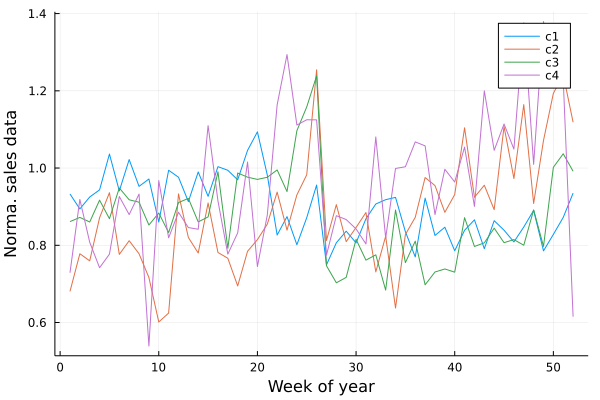

In [20]:
cluster_stds = hcat([std(sales_mat[:, kmpp_best.assignments .== i], dims=2) for i in 1:4]...)
plot(cluster_stds, xlab="Week of year", ylab="Norma. sales data", labels=["c1" "c2" "c3" "c4"])

In [26]:
open("data/assignments.txt", "w") do io
    write(io, join(kmpp_best.assignments, "\n"))
end

1621

# Analysis
## Cluster 1
Cluster one shows fairly steady sales volumes initially and then drops steeply around week 27/28.
Afterwards, the sales volume slightly recovers, but shows a comparatively steep drop during the last two weeks again.  
Maybe this is an effect due to holiday seasons during the year.

## Cluster 2
Compared to cluster one, the second cluster shows steadily increasing sales volumes, but also a steep drop around 27/28.
After the drop, the sales volume continues increasing steadily and jumps upwards sharply from week 51 to 52.  
Due to the size of the spike, this might be an artifact of the data recording, or again related to holidays (e.g. Christmas / New Year's).


## Cluster 3
Cluster three behaves very similar to cluster two. The main difference are the initially higher rise and stronger drop in sales volume and the smaller jump at the end of the year.  
Potentially there might be a relationship of some form between the second and third cluster.

## Cluster 4
Finally, cluster four behaves the most steady of all clusters throughout the year. The sales volume slightly increases during the year and then shows a small drop towards the end, but none of this behavior seems noteworthy compared to the spikes in the other clusters.  
This could be related to product categories that have very stable demand throughout the year.
